In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn import datasets

import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

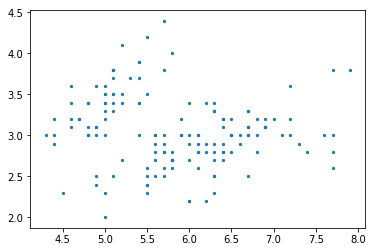

In [3]:
# X = blobs[0]
X = datasets.load_iris().data
# X = datasets.load_digits().data
ClusterUtils.visualize_sample_data(X)

### Test with Parallel Runs

In [10]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['KMeans'], 
                                       dim_reduction_alg_ls=[],
                                       n_evaluations=40, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {KMeans}, Default: KMeans
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 30], Default: 5
  Conditions:
    n_clusters___KMeans | clustering_choice in {'KMeans'}

Truncated n_evaluations: 30
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 5}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 3}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 13}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 4}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 22}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 25}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 17}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 15}
Fitting configuration: {'clustering_choice': 'KM

Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 14}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 19}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 30}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 2}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 16}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 7}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 21}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 20}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 23}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 26}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 27}
Fitting configuration: {'clustering_choice': 'KMeans', 'n_clusters___KMeans': 18}
Fitting configurat

In [11]:
opt_result

Configuration:
  clustering_choice, Value: 'KMeans'
  n_clusters___KMeans, Value: 2

doing TSNE


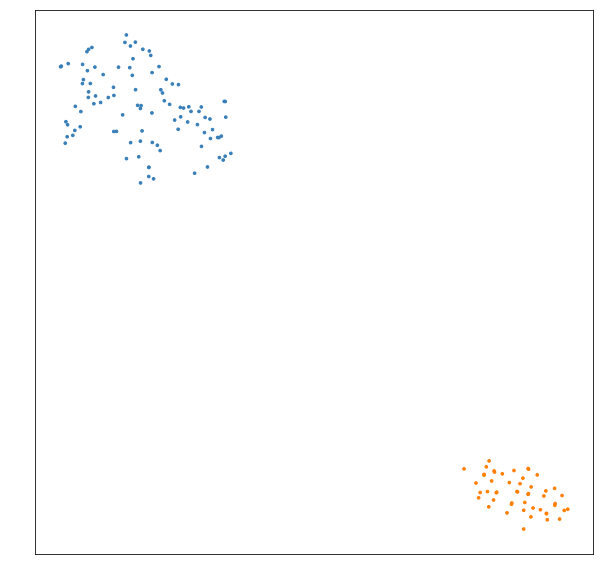

array([0, 1], dtype=int32)

In [12]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [13]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'KMeans'
   n_clusters___KMeans, Value: 5
 , ta_runs=0, ta_time_used=0, wallclock_time=7.915496826171875e-05),
 TrajEntry(train_perf=-0.34296429652983995, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'KMeans'
   n_clusters___KMeans, Value: 5
 , ta_runs=1, ta_time_used=0.06170392036437988, wallclock_time=0.0692894458770752),
 TrajEntry(train_perf=-0.45994823920518635, incumbent_id=2, incumbent=Configuration:
   clustering_choice, Value: 'KMeans'
   n_clusters___KMeans, Value: 3
 , ta_runs=2, ta_time_used=0.11300849914550781, wallclock_time=0.21292591094970703),
 TrajEntry(train_perf=-0.5817500491982808, incumbent_id=3, incumbent=Configuration:
   clustering_choice, Value: 'KMeans'
   n_clusters___KMeans, Value: 2
 , ta_runs=19, ta_time_used=1.512059211730957, wallclock_time=4.226606369018555)]

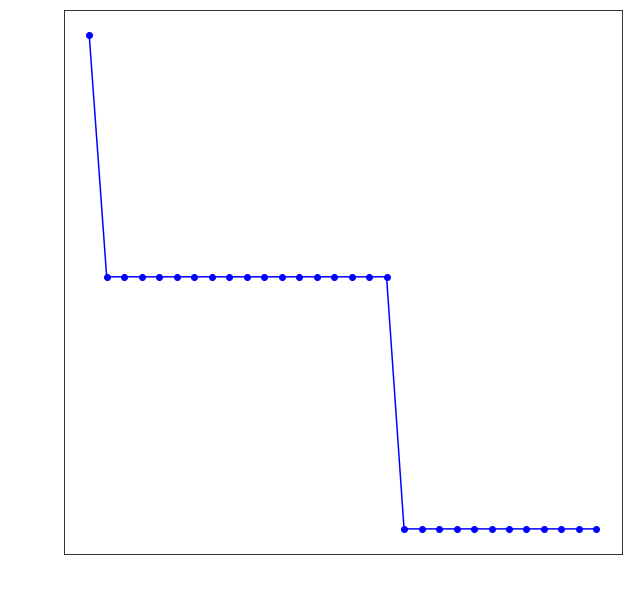

In [14]:
autocluster.plot_convergence()